# Морозова Дарья, ИАД-3

# Домашнее задание 3. 

## Предсказание пользовательской оценки отеля по тексту отзыва.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву. Данные можно скачать [тут](https://www.kaggle.com/c/hseds-texts-2020/data?select=train.csv).

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 1. В противном случае мы будем вынуждены не засчитать задание :( 

Для измерения качества вашей модели используйте разбиение данных на train и test и замеряйте качество на тестовой части.

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Удачи! 💪

#### Использовать внешние данные для обучения строго запрещено. Можно использовать предобученные модели из torchvision.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q "/content/drive/MyDrive/hseds-texts-2020.zip"

In [3]:
PATH_TO_TRAIN_DATA = './train.csv'

In [4]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру. 
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

Добавим в функцию process_text() TextBlob Lemmatizer 
([https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/))

In [5]:
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from textblob import Word, TextBlob

def process_text(text):
    t = TextBlob(text.lower()) # сначала анализируем каждое предложение с помощью TextBlob
    # потом лемматизируем отдельные слова
    return [word.lemmatize() for word in t.words if word not in string.punctuation] 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
df['negative'] = df['negative'].apply(process_text)
df['positive'] = df['positive'].apply(process_text)

Посмотрим, каким стал текст:

In [7]:
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,"[there, were, issue, with, the, wifi, connection]","[no, positive]",7.1
1,00004d18f186bf2489590dc415876f73,"[tv, not, working]","[no, positive]",7.5
2,0000cf900cbb8667fad33a717e9b1cf4,"[more, pillow]","[beautiful, room, great, location, lovely, staff]",10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,"[very, business]",[location],5.4
4,00025e1aa3ac32edb496db49e76bbd00,"[room, could, do, with, a, bit, of, a, refurbi...","[nice, breakfast, handy, for, victoria, train,...",6.7


In [8]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
random.seed(0)
df_train, df_test = train_test_split(df)

### Часть 1. 1 балл

Обучите линенйую регрессию на TF-IDF векторах текстов.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
tfidf_vec = TfidfVectorizer()

Чтобы применить TF-IDF переведем обратно текст из токенов в строки:

In [10]:
def tokens_to_str(text):
    return ' '.join(str(t) for t in text)

In [11]:
X_tr = df_train[['negative', 'positive']]
X_ts = df_test[['negative', 'positive']]

X_tr['negative'] = X_tr['negative'].apply(tokens_to_str)
X_tr['positive'] = X_tr['positive'].apply(tokens_to_str)
X_ts['negative'] = X_ts['negative'].apply(tokens_to_str)
X_ts['positive'] = X_ts['positive'].apply(tokens_to_str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Теперь наш текст будет в виде предобработанных строк:

In [12]:
X_ts.head()

,negative,positive
59095,no clock radio or bedside lamp,great comfortable bed a helpful staff
83543,no negative,excellent location especially for albert hall ...
40282,rude staff even the manager i sent the message...,nothing
72371,no negative,very comfy bed decor wa lovely modern bathroom
16468,not enough staff on at a very busy breakfast t...,polite efficient staff very helpful particular...


In [13]:
# Склеиваем строки negative и positive через пробел
X_train_str = (X_tr['negative'] + ' ' + X_tr['positive']).values
X_test_str = (X_ts['negative'] + ' ' + X_ts['positive']).values

y_train = (df_train['score'].values)
y_test = (df_test['score'].values)

X_train_text = tfidf_vec.fit_transform(X_train_str)
X_test_text = tfidf_vec.transform(X_test_str)

Обучаем регрессию:

In [14]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_text, y_train)
pred = sgdreg.predict(X_test_text)
print("test MAE = ", mean_absolute_error(pred, y_test))

test MAE =  0.9733732545478204


### Часть 2. 3 балла

Обучите линейную регрессию на усредненных Word2Vec векторах. 

In [15]:
import gensim
from gensim.models import Word2Vec

In [16]:
X_tr = df_train[['negative', 'positive']].to_numpy()
X_ts = df_test[['negative', 'positive']].to_numpy()
y_train = (df_train['score'].values)
y_test = (df_test['score'].values)

Трениурем word2vec

In [18]:
w2v = Word2Vec(np.concatenate(X_tr), size=300, window = 10, min_count = 10)
# сконкатенирвали негатив и позитив, чтобы обучить в2в на всех отзывах

Штучка из 3-го дз прошлого года:

In [19]:
# Эмбеддинг предложения - усредненная сумма эмбеддингов токенов

def sentence_embedding(sentence: list) -> np.array:
    embedding_dim = w2v.wv.__getitem__('hotel').shape[0]
    features = np.zeros([embedding_dim], dtype='float32')
    for word in sentence:
        if w2v.wv.__contains__(word):
          features += w2v.wv.__getitem__(word)
    return features/len(features)

Применим эту функцию к негативу - получим вектор1, применим к позитиву - получим вектор2. Конкатинируем эти 2 вектора - получим вектор размерности в 2 раза больше, чем вектор1 и вектор 2 по отдельности.

In [20]:
X_train_wv = [np.concatenate([sentence_embedding(item[0]), sentence_embedding(item[1])]) for item in X_tr]
X_test_wv = [np.concatenate([sentence_embedding(item[0]), sentence_embedding(item[1])]) for item in X_ts]

In [21]:
len(X_train_wv)

75000

Обучаем регрессию:

In [22]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_wv, y_train)
pred = sgdreg.predict(X_test_wv)
print("test MAE = ", mean_absolute_error(pred, y_test))

test MAE =  0.9862274196325996


Еще я пробовала соеденить негатив и позитив в один массив и применять к такому предложению sentence_embedding (то есть получаем один эмбэддинг сразу для негатива и позитива), но качество на регрессии при этом было так себе. 
При конкатенации эмбеддингов для негатива и позитива качество значительно лучше: регрессия выучивает отдельно коэффициенты для позитива и отдельно для негатива.

Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

In [23]:
# Сделаем  словарь, где каждому слову будет соответствовать его idf
idf = tfidf_vec.idf_
d_idf = dict(zip(tfidf_vec.get_feature_names(), idf))
d_idf['price']

4.001897826283635

In [24]:
# Эмбеддинг предложения - сумма эмбеддингов токенов с весами = idf

def sentence_embedding_idf(sentence: list) -> np.array:
    embedding_dim = w2v.wv.__getitem__('hotel').shape[0]
    features = np.zeros([embedding_dim], dtype='float32')
    for word in sentence:
        if w2v.wv.__contains__(word):
          if word in d_idf:
            features += w2v.wv.__getitem__(word) * d_idf[word]
          else:
            features += w2v.wv.__getitem__(word)
    return features/len(features)

Далее аналогично конкатинируем эмбэддинги, полученные с помощью данной функции, для позитива и негатива

In [25]:
X_train_wv_idf = [np.concatenate([sentence_embedding_idf(item[0]), sentence_embedding_idf(item[1])]) for item in X_tr]
X_test_wv_idf = [np.concatenate([sentence_embedding_idf(item[0]), sentence_embedding_idf(item[1])]) for item in X_ts]

Обучаем регрессию:

In [26]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_wv_idf, y_train)
pred = sgdreg.predict(X_test_wv_idf)
print("test MAE = ", mean_absolute_error(pred, y_test))

test MAE =  0.9553075708885709


Проведите эксперименты с размерностью эмбеддинга. Для каждого из двух методов постройте график зависимости качества модели от размерности эмбеддинга.

In [27]:
ebm_size = range(100, 1501, 100)
w2v_mae = []
w2v_idf_mae = []

for n in ebm_size:
    # обучаем w2v с нужным размером эмбеддинга
    w2v = Word2Vec(np.concatenate(X_tr), size=n, window = 10, min_count = 10)
    w2v.build_vocab(np.concatenate(X_ts), update=True)
    w2v.train(np.concatenate(X_ts), total_examples=w2v.corpus_count, epochs=w2v.iter)
    # получаем эмбеддинги для негатива и позитива, конкатинируем
    X_train_wv = [np.concatenate([sentence_embedding(item[0]), sentence_embedding(item[1])]) for item in X_tr]
    X_test_wv = [np.concatenate([sentence_embedding(item[0]), sentence_embedding(item[1])]) for item in X_ts] 
    # обучаем регрессию
    sgdreg = SGDRegressor()
    sgdreg.fit(X_train_wv, y_train)
    pred = sgdreg.predict(X_test_wv)
    # сохраняем MAE на усредненных Word2Vec векторах
    w2v_mae.append(mean_absolute_error(pred, y_test))

    # теперь для Word2Vec со взвешенными idf-ом словами: 
    # получаем эмбеддинги для негатива и позитива, конкатинируем
    X_train_wv_idf = [np.concatenate([sentence_embedding_idf(item[0]), sentence_embedding_idf(item[1])]) for item in X_tr]
    X_test_wv_idf = [np.concatenate([sentence_embedding_idf(item[0]), sentence_embedding_idf(item[1])]) for item in X_ts]
    # обучаем регрессию
    sgdreg = SGDRegressor()
    sgdreg.fit(X_train_wv_idf, y_train)
    pred = sgdreg.predict(X_test_wv_idf)
    w2v_idf_mae.append(mean_absolute_error(pred, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '_

Построим графики:

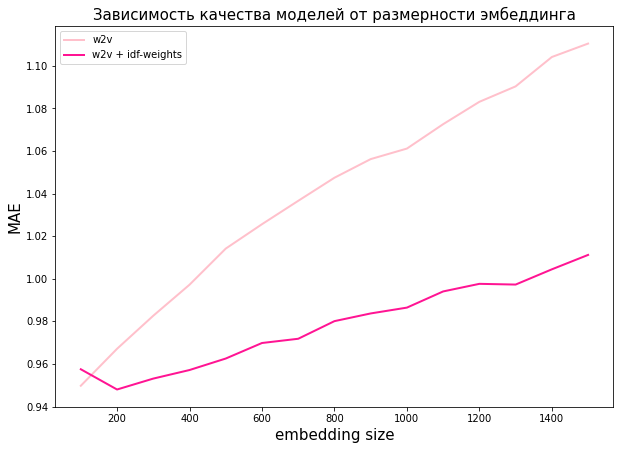

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,7))
plt.plot(ebm_size, w2v_mae, c = 'pink', linewidth = 2)
plt.plot(ebm_size, w2v_idf_mae, c = 'deeppink', linewidth = 2)
plt.title('Зависимость качества моделей от размерности эмбеддинга', fontsize = 15)
plt.xlabel('embedding size', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.legend(['w2v', 'w2v + idf-weights'], loc ='best')
plt.show()

Сделайте выводы:

Обычный w2v дает качество чуть лучше взвешенного idf-ом w2v только до размерности эмбэддинга примерно 150, далее взвешенный w2v стабильно лучше обычного. Так что придание словам соответсвующих весов действительно улучшает качество модели.

Минимальная MAE моделей - примерно 0,95 (у w2v на размере 100, у w2v+idf - на 200). Причем MAE обычного w2v при увеличении размера эмбэддинга растет существенно быстрее, чем MAE взвешенного.

Теперь попробуйте обучить логистическую регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.

Попробуем обучить на FastText:

In [29]:
from gensim.models import FastText

In [30]:
# далее делаем все аналогично как с ворд2век
fasttext = FastText(np.concatenate(X_tr), size=300, window = 10, min_count = 10)

In [31]:
# чуть изменим функцию под фаст текст
def sentence_embedding2(sentence: list) -> np.array:
    embedding_dim = fasttext.wv.__getitem__('hotel').shape[0]
    features = np.zeros([embedding_dim], dtype='float32')
    for word in sentence:
        if fasttext.wv.__contains__(word):
            features += fasttext.wv.__getitem__(word)
    return features/len(features)

In [32]:
# получаем эмбеддинги для негатива и позитива, конкатинируем
X_train_ft = [np.concatenate([sentence_embedding2(item[0]), sentence_embedding2(item[1])]) for item in X_tr]
X_test_ft = [np.concatenate([sentence_embedding2(item[0]), sentence_embedding2(item[1])]) for item in X_ts] 

Обучаем регрессию:

In [33]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_ft, y_train)
pred = sgdreg.predict(X_test_ft)
print("test MAE = ", mean_absolute_error(pred, y_test))

test MAE =  0.986670320564286


Качество оочень близко к качеству, полученному на w2v

Попробуем теперь так же добавит idf веса к эмбэддингам слов fasttext:

In [34]:
def sentence_embedding2_idf(sentence: list) -> np.array:
    embedding_dim = fasttext.wv.__getitem__('hotel').shape[0]
    features = np.zeros([embedding_dim], dtype='float32')
    for word in sentence:
        if fasttext.wv.__contains__(word):
          if word in d_idf:
            features += fasttext.wv.__getitem__(word) * d_idf[word]
          else:
            features += fasttext.wv.__getitem__(word)
    return features/len(features)

In [35]:
X_train_ft_idf = [np.concatenate([sentence_embedding2_idf(item[0]), sentence_embedding2_idf(item[1])]) for item in X_tr]
X_test_ft_idf = [np.concatenate([sentence_embedding2_idf(item[0]), sentence_embedding2_idf(item[1])]) for item in X_ts] 

In [36]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_ft_idf, y_train)
pred = sgdreg.predict(X_test_ft_idf)
print("test MAE = ", mean_absolute_error(pred, y_test))

test MAE =  0.9644652404203823


Попробуем обучить на Glove (по примеру [https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python](https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python) и [https://stackoverflow.com/questions/48962171/how-to-train-glove-algorithm-on-my-own-corpus](https://stackoverflow.com/questions/48962171/how-to-train-glove-algorithm-on-my-own-corpus))

In [37]:
!pip install glove_python

     |████████████████████████████████| 266kB 18.0MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700255 sha256=4ed3e67b846b4b14f880cf034ff90abb1917008dcad2b8e9ec3ded516080b16e
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [38]:
from glove import Corpus, Glove
#Creating a corpus object
corpus = Corpus() 
#Training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(np.concatenate(X_tr), window=10)
glove = Glove(no_components=5, learning_rate=0.05) 
glove.fit(corpus.matrix, epochs=10, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [39]:
# у Glove есть свои особенности с получением эмбэддингов слов, поэтому опять подкорректируем функцию:
def sentence_embedding3(sentence: list) -> np.array:
    embedding_dim = glove.word_vectors[glove.dictionary['hotel']].shape[0]
    features = np.zeros([embedding_dim], dtype='float32')
    for word in sentence:
        if word in glove.dictionary:
          features += glove.word_vectors[glove.dictionary[word]]
    return features/len(features)

In [40]:
# получаем эмбеддинги для негатива и позитива, конкатинируем
X_train_gl = [np.concatenate([sentence_embedding3(item[0]), sentence_embedding3(item[1])]) for item in X_tr]
X_test_gl = [np.concatenate([sentence_embedding3(item[0]), sentence_embedding3(item[1])]) for item in X_ts] 

In [41]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_gl, y_train)
pred = sgdreg.predict(X_test_gl)
print("test MAE = ", mean_absolute_error(pred, y_test))

test MAE =  1.0694182061190802


Выводы:

Для размера эмбэддинга = 300 качество w2v и fasttext получилось практически одинаковым (примерно 0.9866). MAE для Glove получилось самым большим - 1.069, а взвешенный idf-ом w2v дает лучший результат из всех опробованных вариантов - 0.955 (у взвешенного idf-ом фасттекста чуть больше - 0.964).

Таким образом, фасттекст практически не отличается по качеству от w2v, а Glove хуже их обоих. Добавление к эмбэддингам слов idf-весов всегда улучшает модель.

### Часть 3. 6 баллов

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки. Получите ошибку меньше, чем во всех вышеперечисленных методах.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

In [ ]:
WORDS = set()
for sent in list(df['positive']):
    for w in sent:
        WORDS.add(w)
        
for sent in list(df['negative']):
    for w in sent:
        WORDS.add(w)

In [ ]:
int2word = dict(enumerate(tuple(WORDS)))
word2int = {w: ii for ii, w in int2word.items()}

In [ ]:
MAX_LEN = max(max(df['positive'].apply(len)), max(df['negative'].apply(len)))

In [ ]:
MAX_LEN

399

Посмотрим на распределение длин отзывов:

(array([1.33869e+05, 1.19750e+04, 2.56800e+03, 8.14000e+02, 3.69000e+02,
        1.69000e+02, 9.30000e+01, 5.20000e+01, 4.80000e+01, 4.30000e+01]),
 array([  0. ,  39.9,  79.8, 119.7, 159.6, 199.5, 239.4, 279.3, 319.2,
        359.1, 399. ]),
 <a list of 10 Patch objects>)

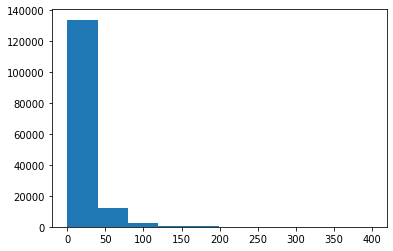

In [ ]:
import matplotlib.pyplot as plt

positive_length = df_train['positive'].apply(lambda x: len(x))
negative_length = df_train['negative'].apply(lambda x: len(x))
plt.hist(np.concatenate((positive_length.values, negative_length.values)))

Ограничим максимальную длину предложения до 100

In [ ]:
df_train_trunc = df_train[(df_train['positive'].apply(lambda x: len(x) < 100) | 
                           df_train['negative'].apply(lambda x: len(x) < 100))]

In [ ]:
DEVICE = torch.device('cuda')

In [ ]:
from torch.nn.utils.rnn import pad_sequence

(При поддержке [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html))

In [ ]:
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df
        # добавим нулевой паддинг ко всем предложениям
        self.pos_data = pad_sequence(
            [torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in df['positive']], 
            batch_first=True
        )
        self.neg_data = pad_sequence(
            [torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in df['negative']], 
            batch_first=True
        )
        self.target = torch.tensor(df['score'].values)
        
    def __len__(self):
        return self.target.shape[0]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = {
            'positive': self.pos_data[idx],
            'negative': self.neg_data[idx],
            'target': self.target[idx],
            'pos_no_padding': torch.sum(self.pos_data[idx] != 0) - 1,
            'neg_no_padding': torch.sum(self.neg_data[idx] != 0) - 1
        }

        return sample

In [ ]:
BATCH_SIZE = 64

train_dataset = ReviewsDataset(df_train_trunc)
test_dataset = ReviewsDataset(df_test)

train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=BATCH_SIZE)

In [ ]:
class RNN_custom(nn.Module):
    def __init__(self, emb_size=256, hid_size=64, dict_size=len(WORDS)):
        super().__init__()
        self.emb_size = emb_size
        self.hid_size = hid_size
        
        self.embedding_positive = nn.Embedding(
            num_embeddings=dict_size,
            embedding_dim=emb_size,
            padding_idx=0
        ) 

        self.embedding_negative = nn.Embedding(
            num_embeddings=dict_size,
            embedding_dim=emb_size,
            padding_idx=0
        )

        self.rnn_positive = nn.RNN(
            input_size = emb_size,
            hidden_size=hid_size,
            batch_first=True
        )

        self.rnn_negative = nn.RNN(
            input_size = emb_size,
            hidden_size=hid_size,
            batch_first=True,
        )

        self.head_layer = nn.Sequential(
            nn.Linear(hid_size * 2, hid_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hid_size, 1)
        )

    def forward(self, batch):
        embeddings_pos = self.embedding_positive(batch['positive'])
        embeddings_neg = self.embedding_negative(batch['negative'])
        #mask_pos = batch['pos_no_padding']
        #mask_neg = batch['neg_no_padding']

        batch_size = batch['target'].shape[0]

        hs_pos = self.rnn_positive(embeddings_pos)[0].squeeze()
        hs_neg = self.rnn_negative(embeddings_neg)[0].squeeze()
        
        h_pos = torch.zeros((hs_pos.shape[0], hs_pos.shape[2]), device=DEVICE)
        h_neg = torch.zeros((hs_neg.shape[0], hs_neg.shape[2]), device=DEVICE)

        for i in range(batch_size):
            h_pos[i] = hs_pos[i][batch['pos_no_padding'][i]]
            h_neg[i] = hs_neg[i][batch['neg_no_padding'][i]]

        rnn_vector = torch.cat((h_pos, h_neg), dim=1)
        result_value = self.head_layer(rnn_vector)
        return result_value.squeeze()

Для обучения воспользуемся Адамом и L1-метрикой - она же MAE:

In [ ]:
model = RNN_custom().to(DEVICE)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.L1Loss()

In [ ]:
import tqdm

NUM_EPOCHS = 25

for n in range(NUM_EPOCHS):
    model.train()
    for it, batch in tqdm.notebook.tqdm(enumerate(train_dataloader), total=len(train_dataset) // BATCH_SIZE):
        batch = {k: v.to(DEVICE) for k,v in batch.items()}
        pred = model(batch)
        loss = criterion(pred, batch['target'])
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    model.eval()
    error = 0.
    for batch in test_dataloader:
        batch = {k: v.to(DEVICE) for k,v in batch.items()}
        with torch.no_grad():
            error += criterion(model(batch), batch['target'])
    print('EPOCH %d : MAE = %f' % (n, error / (len(test_dataset) // BATCH_SIZE)))


EPOCH 0 : MAE = 1.014510



EPOCH 1 : MAE = 0.986368



EPOCH 2 : MAE = 0.958796



EPOCH 3 : MAE = 0.933747



EPOCH 4 : MAE = 0.914228



EPOCH 5 : MAE = 0.912668



EPOCH 6 : MAE = 0.885342



EPOCH 7 : MAE = 0.876069



EPOCH 8 : MAE = 0.924472



EPOCH 9 : MAE = 0.908778



EPOCH 10 : MAE = 0.913651



EPOCH 11 : MAE = 0.930550



EPOCH 12 : MAE = 0.906076



EPOCH 13 : MAE = 0.881430



EPOCH 14 : MAE = 0.883658



EPOCH 15 : MAE = 0.882731



EPOCH 16 : MAE = 0.876559



EPOCH 17 : MAE = 0.891221



EPOCH 18 : MAE = 0.900781



EPOCH 19 : MAE = 0.913362



EPOCH 20 : MAE = 0.889222



EPOCH 21 : MAE = 0.890740



EPOCH 22 : MAE = 0.881793



EPOCH 23 : MAE = 0.892239



EPOCH 24 : MAE = 0.887179


Минимальная MAE в предыдущих частях была 0.955, с помощью RNN удалось понизить ее до 0.876.

### Бонус. 10 баллов

Побейте качество 0.75 в [соревновании](https://www.kaggle.com/c/hseds-texts-2020/leaderboard). Можете воспользоваться вышеперечисленными методами или попробовать что-нибудь еще.